# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

In [ ]:
#RFM is a method that helps you analyze and understand your customers based on their score on each of these three factors: 
#Recency, Frequency, and Monetary Value

❓ Can you summarize what each metric measures in one sentence?

In [ ]:
#Recency : how recently
#Frequency: with what frequency
#Monetary Value: what value did they buy

❓ What data / or type of data do you need for each metric ? 

In [ ]:
#Recency: customer_unique_id / order_purchase_timestamp / 
#Frequency: customer_unique_id / order_id / order_purchase_timestamp
#Monetary Value: customer_unique_id / payment_value / order_purchase_timestamp

Let's explore the dataset!

# Exploratory Data Analysis

Load the dataset and start an Exploratory Data Analysis

In [1]:
import pandas as pd 

In [39]:
df = pd.read_csv('C:/Users/User/Desktop/Analyse de client/db_customers.csv')
df.head()

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto


In [9]:
df.shape

(105383, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       105383 non-null  object 
 1   order_status                   105383 non-null  object 
 2   order_purchase_timestamp       105383 non-null  object 
 3   order_delivered_customer_date  102224 non-null  object 
 4   payment_type                   105382 non-null  object 
 5   payment_installments           105382 non-null  float64
 6   payment_value                  105382 non-null  float64
 7   review_score                   105383 non-null  int64  
 8   customer_unique_id             105383 non-null  object 
 9   customer_zip_code_prefix       105383 non-null  int64  
 10  customer_city                  105383 non-null  object 
 11  customer_state                 105383 non-null  object 
 12  product_category_name_english 

❓ Which features should be formated in datetime ? 
Convert them

In [40]:
#Recence 
from datetime import datetime
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)

In [41]:
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].apply(pd.to_datetime)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       105383 non-null  object        
 1   order_status                   105383 non-null  object        
 2   order_purchase_timestamp       105383 non-null  datetime64[ns]
 3   order_delivered_customer_date  102224 non-null  datetime64[ns]
 4   payment_type                   105382 non-null  object        
 5   payment_installments           105382 non-null  float64       
 6   payment_value                  105382 non-null  float64       
 7   review_score                   105383 non-null  int64         
 8   customer_unique_id             105383 non-null  object        
 9   customer_zip_code_prefix       105383 non-null  int64         
 10  customer_city                  105383 non-null  object        
 11  

In [43]:
df.head()

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto


❓ Which features are Categorical ? List the unique values on these features.

In [18]:
df["customer_city"].unique() 

array(['sao paulo', 'barreiras', 'vianopolis', ..., 'messias targino',
       'campo do tenente', 'nova vicosa'], dtype=object)

In [19]:
df["customer_state"].unique() 

array(['SP', 'BA', 'GO', 'RN', 'PR', 'RS', 'RJ', 'MG', 'SC', 'RR', 'PE',
       'TO', 'CE', 'DF', 'SE', 'MT', 'PB', 'PA', 'RO', 'ES', 'AP', 'MS',
       'MA', 'PI', 'AL', 'AC', 'AM'], dtype=object)

In [17]:
df["product_category_name_english"].unique() 

array(['housewares', 'perfumery', 'auto', 'pet_shop', 'stationery', nan,
       'furniture_decor', 'office_furniture', 'garden_tools',
       'computers_accessories', 'bed_bath_table', 'toys',
       'construction_tools_construction', 'telephony', 'health_beauty',
       'electronics', 'baby', 'cool_stuff', 'watches_gifts',
       'air_conditioning', 'sports_leisure', 'books_general_interest',
       'small_appliances', 'food', 'luggage_accessories',
       'fashion_underwear_beach', 'christmas_supplies',
       'fashion_bags_accessories', 'musical_instruments',
       'construction_tools_lights', 'books_technical',
       'costruction_tools_garden', 'home_appliances', 'market_place',
       'agro_industry_and_commerce', 'party_supplies', 'home_confort',
       'cds_dvds_musicals', 'industry_commerce_and_business',
       'consoles_games', 'furniture_bedroom', 'construction_tools_safety',
       'fixed_telephony', 'drinks',
       'kitchen_dining_laundry_garden_furniture', 'fashion_sho

In [15]:
df["payment_type"].value_counts()

credit_card    77844
boleto         20066
voucher         5923
debit_card      1546
not_defined        3
Name: payment_type, dtype: int64

In [8]:
df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [14]:
df['order_status'].value_counts()

delivered      102225
shipped          1180
canceled          669
unavailable       651
invoiced          330
processing        321
created             5
approved            2
Name: order_status, dtype: int64

❓ Check for missing values. What do you notice ? 


In [13]:
df.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
dtype: int64

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [ ]:
# 1 not paid yet
# 3158 not delivered yet 

❓ What are the proportions of each `order_status` ? 

In [21]:
df['order_status'].value_counts(normalize=True)

delivered      0.970033
shipped        0.011197
canceled       0.006348
unavailable    0.006177
invoiced       0.003131
processing     0.003046
created        0.000047
approved       0.000019
Name: order_status, dtype: float64

❓ Which `order_status` do you think should be removed from the analysis

In [ ]:
# Removed : canceled  unavailable  invoiced   processing  created   approved  
# We keep 98% of data, delivered and shipped 

In [48]:
df_new = df[(df['order_status'] != "delivered") & (df['order_status'] != "shipped")].index
df.drop(df_new , inplace=True)
df['order_status'].value_counts()

delivered    102225
shipped        1180
Name: order_status, dtype: int64

❓ What feature would you choose in the e-commerce dataset provided? 

In [ ]:
#Recency: customer_unique_id / order_purchase_timestamp / 
#Frequency: customer_unique_id / order_id / order_purchase_timestamp
#Monetary Value: customer_unique_id / payment_value / order_purchase_timestamp

# Features to keep : order_id / customer_unique_id  / order_purchase_timestamp / payment_value 

In [50]:
df_RFM = df[["customer_unique_id", "order_id", "order_purchase_timestamp", "payment_value" ]]
df_RFM.head()

,customer_unique_id,order_id,order_purchase_timestamp,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.12
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2.00
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.59
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103405 entries, 0 to 105382
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103405 non-null  object        
 1   order_status                   103405 non-null  object        
 2   order_purchase_timestamp       103405 non-null  datetime64[ns]
 3   order_delivered_customer_date  102217 non-null  datetime64[ns]
 4   payment_type                   103404 non-null  object        
 5   payment_installments           103404 non-null  float64       
 6   payment_value                  103404 non-null  float64       
 7   review_score                   103405 non-null  int64         
 8   customer_unique_id             103405 non-null  object        
 9   customer_zip_code_prefix       103405 non-null  int64         
 10  customer_city                  103405 non-null  object        
 11  

❓ What method would you use to group the data? 

In [ ]:
#groupby 

❓ What feature would you use to group the data? 

In [ ]:
#customer_unique_id

Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

In [69]:
clients_group = df_RFM.groupby('customer_unique_id')[["order_purchase_timestamp"]].max() 
clients_group.head()

,order_purchase_timestamp
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

In [ ]:
#Timedelta operations on data 

In [58]:
from datetime import timedelta

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least purchase?

In [63]:
date_least = min(df.order_purchase_timestamp)
date_least

Timestamp('2016-09-04 21:15:19')

❓What is the date of the most recent purchase?

In [51]:
date_ref = max(df.order_purchase_timestamp)
date_ref

Timestamp('2018-09-03 09:06:57')

In [53]:
df_RFM.head()

,customer_unique_id,order_id,order_purchase_timestamp,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.12
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2.00
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.59
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12


In [70]:
#clients_group = df_RFM.groupby('customer_unique_id')[["order_purchase_timestamp"]].max() 
clients_group.head()

,order_purchase_timestamp
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [73]:
recens_date = df['order_purchase_timestamp'].max() + timedelta(days=1)

In [74]:
clients_group['Recency'] = clients_group.order_purchase_timestamp.apply(lambda x : (recens_date - x).days)

In [75]:
clients_group.head()

,order_purchase_timestamp,Recency
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293


In [62]:
Recence.dtypes

order_purchase_timestamp    timedelta64[ns]
dtype: object

❓What is the date of the most recent purchase?

In [59]:
date_ref = max(df.order_purchase_timestamp)
date_ref

Timestamp('2018-09-03 09:06:57')

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

In [ ]:
#The most recent purchase in the dataset 

Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

In [76]:
#Fait au dessus
clients_group.head()

,order_purchase_timestamp,Recency
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293


Now that you have created a new dataset with the right columns, explore it to understand what you created.

In [77]:
df_RFM.head()

,customer_unique_id,order_id,order_purchase_timestamp,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.12
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2.00
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,18.59
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,141.46
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,179.12


In [79]:
#Frequence
dfAgg=df_RFM.groupby(['customer_unique_id']).agg(Montant=pd.NamedAgg(column='payment_value', aggfunc=sum), Fréquence=pd.NamedAgg(column='payment_value', aggfunc='count'),Paniermoy=pd.NamedAgg(column='payment_value', aggfunc='mean')).reset_index()
dfAgg

,customer_unique_id,Montant,Fréquence,Paniermoy
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1,27.19
2,0000f46a3911fa3c0805444483337064,86.22,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89,1,196.89
...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,1,2067.42
94395,fffea47cd6d3cc0a88bd621562a9d061,84.58,1,84.58
94396,ffff371b4d645b6ecea244b27531430a,112.46,1,112.46
94397,ffff5962728ec6157033ef9805bacc48,133.69,1,133.69


In [80]:
dfAgg["Fréquence"].unique()

array([ 1,  2,  4,  6,  3, 12,  5,  8, 11,  9, 14, 24, 10, 19, 22, 15,  7,
       26, 13,  0, 29, 16, 54, 23], dtype=int64)

In [94]:
RFM = clients_group.merge(dfAgg, how = 'left', left_on='customer_unique_id', right_on='customer_unique_id')
RFM.head()

,customer_unique_id,order_purchase_timestamp,Recency,Montant,Fréquence,Paniermoy
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,141.90,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,27.19,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,86.22,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,43.62,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,196.89,1,196.89


In [96]:
df_ecom = RFM.drop(["order_purchase_timestamp","Paniermoy"], axis = 1)

In [97]:
df_ecom.head()

,customer_unique_id,Recency,Montant,Fréquence
0,0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,1
2,0000f46a3911fa3c0805444483337064,542,86.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,293,196.89,1


❓Which column is the R? The F? The M?

In [ ]:
#R: Recence 
#F: Fréquence 
#M: Montant 

Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [98]:
df_ecom.describe()

,Recency,Montant,Fréquence
count,94399.000000,94399.000000,94399.000000
mean,242.864162,168.250134,1.095393
std,152.723176,232.880460,0.530316
min,1.000000,0.000000,0.000000
25%,119.000000,63.110000,1.000000
50%,224.000000,108.100000,1.000000
75%,352.000000,184.590000,1.000000
max,729.000000,13664.080000,54.000000


In [160]:
df_ecommerce = df_ecom.copy()

In [161]:
df_ecommerce = df_ecommerce.drop("customer_unique_id", axis = 1)

In [162]:
df_ecommerce.head()

,Recency,Montant,Fréquence,k
0,116,141.90,1,0
1,119,27.19,1,0
2,542,86.22,1,2
3,326,43.62,1,2
4,293,196.89,1,2


In [99]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [120]:
model = KMeans(n_clusters=3)
model.fit(df_ecommerce)
model.predict(df_ecommerce)
df_ecom["k"] = model.predict(df_ecommerce)
df_ecom

,customer_unique_id,Recency,Montant,Fréquence,k
0,0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,1,0
2,0000f46a3911fa3c0805444483337064,542,86.22,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,43.62,1,2
4,0004aac84e0df4da2b147fca70cf8255,293,196.89,1,2
...,...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,452,2067.42,1,1
94395,fffea47cd6d3cc0a88bd621562a9d061,267,84.58,1,2
94396,ffff371b4d645b6ecea244b27531430a,573,112.46,1,2
94397,ffff5962728ec6157033ef9805bacc48,124,133.69,1,0


In [121]:
df_ecom["k"].value_counts()

0    52429
2    38524
1     3446
Name: k, dtype: int64

In [110]:
import matplotlib.pyplot as plt

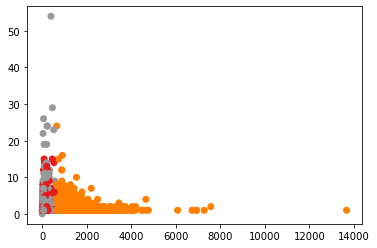

In [122]:
plt.scatter(df_ecom["Montant"], df_ecom["Fréquence"], c = df_ecom["k"], cmap = plt.cm.Set1)

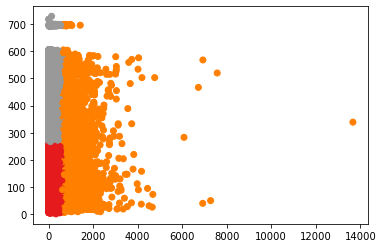

In [123]:
plt.scatter(df_ecom["Montant"], df_ecom["Recency"], c = df_ecom["k"], cmap = plt.cm.Set1)

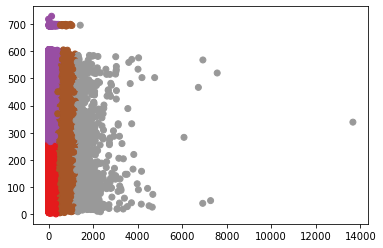

In [119]:
#plt.scatter(df_ecom["Montant"], df_ecom["Recency"], c = df_ecom["k"], cmap = plt.cm.Set1) / 4 cluster 

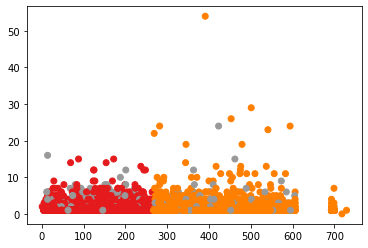

In [115]:
plt.scatter(df_ecom["Recency"], df_ecom["Fréquence"], c = df_ecom["k"], cmap = plt.cm.Set1)

In [125]:
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k', ylabel='Montant'>

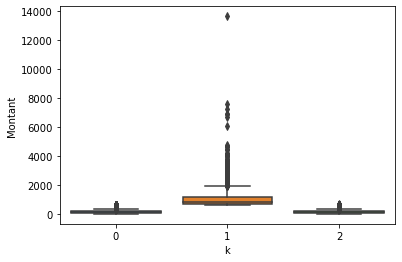

In [126]:
sns.boxplot(df_ecom.k, df_ecom.Montant)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k', ylabel='Recency'>

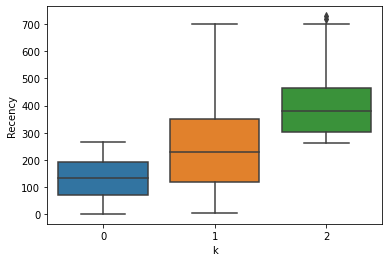

In [127]:
sns.boxplot(df_ecom.k, df_ecom.Recency)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k', ylabel='Fréquence'>

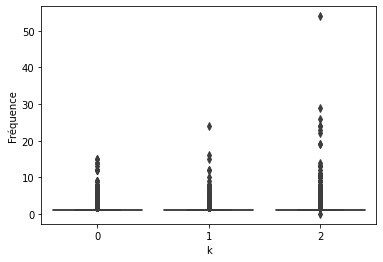

In [128]:
sns.boxplot(df_ecom.k, df_ecom.Fréquence)

Now that you have clusters for each category, explain the different buying behaviors

In [ ]:
# Cluster 1: 

# Cluster 2: 

# Cluster 3: 

In [220]:
df_ecom.head()

,customer_unique_id,Recency,Montant,Fréquence,k
0,0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,1,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,1,0
2,0000f46a3911fa3c0805444483337064,542,86.22,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,43.62,1,2
4,0004aac84e0df4da2b147fca70cf8255,293,196.89,1,2


In [221]:
df_ecom_score = df_ecom.drop("k", axis = 1)

In [158]:
df_ecom_score.describe([0.1, 0.2]).T

,count,mean,std,min,10%,20%,50%,max
Recency,94399.0,242.864162,152.723176,1.0,47.00,97.00,224.0,729.00
Montant,94399.0,168.250134,232.880460,0.0,40.13,55.37,108.1,13664.08
Fréquence,94399.0,1.095393,0.530316,0.0,1.00,1.00,1.0,54.00
R,94399.0,1.406742,0.491228,1.0,1.00,1.00,1.0,2.00
F,94399.0,1.066569,0.249275,1.0,1.00,1.00,1.0,2.00
M,94399.0,1.134016,0.340672,1.0,1.00,1.00,1.0,2.00


In [ ]:
#Cluster manuel
# Montant : < 250 et  > 250 / niveau 1/2
# Recency : < 270 et > 270 / Niveau 1 et 2
# Fréquence: < 1 et > 1/ Niveau 1 et 2

In [222]:
df_ecom_score["R"] = [1 if x > 270  else 2 for x in df_ecom_score['Recency']]
df_ecom_score["F"] = [2 if x > 1  else 1 for x in df_ecom_score['Fréquence']]
#df_ecom_score["M"] = [1 if x < 100 3 elif  x > 300 else 2 for x in df_ecom_score['Montant']]
df_ecom_score.head()

,customer_unique_id,Recency,Montant,Fréquence,R,F
0,0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,1,2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,1,2,1
2,0000f46a3911fa3c0805444483337064,542,86.22,1,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,43.62,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,293,196.89,1,1,1


In [223]:
def m_score (x):
    if x <= df_ecom_score['Montant'][200]:
        return 3
    elif x <= df_ecom_score['Montant'][100]:
        return 2
    else:
        return 1

In [224]:
df_ecom_score['M'] = df_ecom_score['Montant'].apply(lambda x: m_score(x))

In [225]:
df_ecom_score['RFM Score'] = df_ecom_score['R'].map(str) + df_ecom_score['F'].map(str) + df_ecom_score['M'].map(str)
df_ecom_score.head()

,customer_unique_id,Recency,Montant,Fréquence,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,1,2,1,1,211
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,1,2,1,3,213
2,0000f46a3911fa3c0805444483337064,542,86.22,1,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,326,43.62,1,1,1,3,113
4,0004aac84e0df4da2b147fca70cf8255,293,196.89,1,1,1,1,111


In [172]:
#df_ecom_score["RFM Score"].astype(int)

0        211
1        213
2        111
3        113
4        111
        ... 
94394    111
94395    211
94396    111
94397    211
94398    111
Name: RFM Score, Length: 94399, dtype: int32

In [226]:
df_ecom_score["RFM Score"].value_counts(ascending=True)

123      375
223      441
121     2221
221     3247
113     9728
213    14160
111    26072
211    38155
Name: RFM Score, dtype: int64

In [ ]:
#Client fidèle
#Client Premium 
#Lost 

In [233]:
def categ(x):
    if x in["111", "112"]:
        return "Lost"
    elif x in["221", "222"]:
         return "Fidèle"
    elif x in["123", "223", "113"]:
        return "Premium"
    else:
        return "Lambda"

In [234]:
df_ecom_score['Caté'] = df_ecom_score['RFM Score'].apply(categ)

In [235]:
df_ecom_score.head()

,customer_unique_id,Recency,Montant,Fréquence,R,F,M,RFM Score,Caté
0,0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,1,2,1,1,211,Lambda
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,1,2,1,3,213,Lambda
2,0000f46a3911fa3c0805444483337064,542,86.22,1,1,1,1,111,Lost
3,0000f6ccb0745a6a4b88665a16c9f078,326,43.62,1,1,1,3,113,Premium
4,0004aac84e0df4da2b147fca70cf8255,293,196.89,1,1,1,1,111,Lost


In [236]:
df_ecom_score['Caté'].value_counts()

Lambda     54536
Lost       26072
Premium    10544
Fidèle      3247
Name: Caté, dtype: int64

(array([54536.,     0.,     0., 35800.,     0.,     0.,  3688.,     0.,
            0.,   375.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

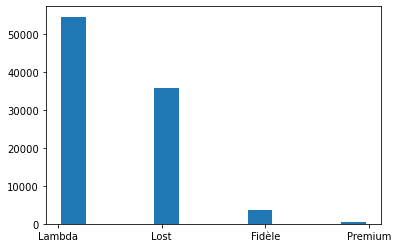

In [231]:
import matplotlib.pyplot as plt
plt.hist(df_ecom_score['Caté'], rwidth=0.8)

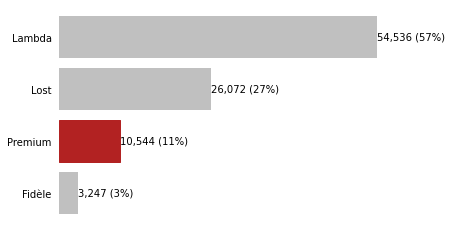

In [237]:
# count the number of customers in each segment
categ_counts = df_ecom_score['Caté'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(categ_counts)),
              categ_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(categ_counts)))
ax.set_yticklabels(categ_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if categ_counts.index[i] in ['Premium']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/categ_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

# Working with cohorts

❓What is a cohort? 

In [ ]:
#Une analyse qui permet de voir le taux de fidélité des clients à travers le temps 

❓Why is it interesting to analyse cohorts ? 

In [ ]:
#Savoir si nos clients reviennent, si oui combien ? et quelle stratégie marketing mettre en place, et suivre les résultats 
#pour savoir si les stratégies marketing sont efficaces 

❓What data (already existing in the original dataset) do we need to build a cohort? 

In [ ]:
#"customer_unique_id", "order_id", "order_purchase_timestamp"

Build a new df with just these 3 features

In [238]:
df.head()

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto


In [242]:
df_cohort = df[["customer_unique_id", "order_id", "order_purchase_timestamp"]]
df_cohort.head()

,customer_unique_id,order_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49


Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [243]:
df_cohort["order_time_month"] = df_cohort["order_purchase_timestamp"].dt.to_period("M")

<ipython-input-243-901b01aa010c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cohort["order_time_month"] = df_cohort["order_purchase_timestamp"].dt.to_period("M")


In [249]:
df_cohort.head()

,customer_unique_id,order_id,order_purchase_timestamp,order_time_month
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08


Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [279]:
df_c = df_cohort.copy()

In [280]:
df_c

,customer_unique_id,order_id,order_purchase_timestamp,order_time_month
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08
...,...,...,...,...
105378,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03
105379,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02
105380,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-08
105381,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01


In [281]:
# For the teachers, To filter by only the customer that have done 2 or more purchases
df_more =pd.DataFrame(df_c.groupby('customer_unique_id').size()[df_c.groupby('customer_unique_id').size() > 1])
df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(columns={0:'na'})

df_c = df_c[df_c['na'].notna()]

In [ ]:
# Créer un dataframe en filtrant les users qui ont commandé au moins 2 fois (et plus)
# Faire une left join entre le df de base(avec toutes les lignes) et celui filtré , 
# nouvelle colonne avec soit na soit "vide"
# Droper les colonnes vides 

In [282]:
df_c

,customer_unique_id,order_id,order_purchase_timestamp,order_time_month,na
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10,4.0
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10,4.0
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10,4.0
10,299905e3934e9e181bfb2e164dd4b4f8,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07-29 11:55:02,2017-07,2.0
11,299905e3934e9e181bfb2e164dd4b4f8,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07-29 11:55:02,2017-07,2.0
...,...,...,...,...,...
103389,9e4accf95024aa6565ca1efcadb96752,19dba6d1e58b04e7fc820558a38ea398,2018-05-12 13:42:24,2018-05,2.0
103395,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:37,2017-10,2.0
103396,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:37,2017-10,2.0
103397,e03dbdf5e56c96b106d8115ac336f47f,aa04ef5214580b06b10e2a378300db44,2017-01-27 00:30:03,2017-01,2.0


In [283]:
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_c

,customer_unique_id,order_id,order_purchase_timestamp,order_time_month,na,cohort
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10,4.0,2017-09
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10,4.0,2017-09
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10,4.0,2017-09
10,299905e3934e9e181bfb2e164dd4b4f8,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07-29 11:55:02,2017-07,2.0,2017-07
11,299905e3934e9e181bfb2e164dd4b4f8,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07-29 11:55:02,2017-07,2.0,2017-07
...,...,...,...,...,...,...
103389,9e4accf95024aa6565ca1efcadb96752,19dba6d1e58b04e7fc820558a38ea398,2018-05-12 13:42:24,2018-05,2.0,2017-09
103395,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:37,2017-10,2.0,2017-10
103396,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:37,2017-10,2.0,2017-10
103397,e03dbdf5e56c96b106d8115ac336f47f,aa04ef5214580b06b10e2a378300db44,2017-01-27 00:30:03,2017-01,2.0,2017-01


Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

In [285]:
df_coh =df_c.groupby(['cohort', 'order_time_month'])\
              .agg(n_customers=('customer_unique_id', 'nunique'))\
              .reset_index(drop=False)
df_coh

,cohort,order_time_month,n_customers
0,2016-10,2016-10,24
1,2016-10,2017-04,1
2,2016-10,2017-07,1
3,2016-10,2017-09,1
4,2016-10,2017-11,1
...,...,...,...
214,2018-06,2018-08,16
215,2018-07,2018-07,295
216,2018-07,2018-08,31
217,2018-08,2018-08,229


Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

In [276]:
from operator import attrgetter

In [286]:
df_coh['period_number'] = (df_coh.order_time_month - df_coh.cohort).apply(attrgetter('n'))

df_coh.head()

,cohort,order_time_month,n_customers,period_number
0,2016-10,2016-10,24,0
1,2016-10,2017-04,1,6
2,2016-10,2017-07,1,9
3,2016-10,2017-09,1,11
4,2016-10,2017-11,1,13


Explore a cohort (for example 2017-01) and try to understand what it shows

In [287]:
df_coh[df_coh["cohort"] == "2017-01"]

,cohort,order_time_month,n_customers,period_number
11,2017-01,2017-01,77,0
12,2017-01,2017-02,3,1
13,2017-01,2017-03,2,2
14,2017-01,2017-04,1,3
15,2017-01,2017-05,3,4
16,2017-01,2017-06,1,5
17,2017-01,2017-07,3,6
18,2017-01,2017-08,1,7
19,2017-01,2017-09,1,8
20,2017-01,2017-11,3,10


Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

In [290]:
df_piv = df_coh.pivot_table(index= "cohort", columns = "period_number", values = "n_customers")
df_piv.head()

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-10,24.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,77.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,132.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN
2017-03,223.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN


Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

In [292]:
cohort_size = df_piv.iloc[:,0]
retention_matrix = df_piv.divide(cohort_size, axis = 0)
retention_matrix.head()

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.041667,NaN,NaN,0.041667,NaN,0.041667,NaN,0.041667,NaN,0.041667,NaN,0.041667,0.083333,0.083333
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.038961,0.025974,0.012987,0.038961,0.012987,0.038961,0.012987,0.012987,NaN,0.038961,0.012987,0.064935,0.038961,0.012987,0.012987,0.025974,0.038961,0.012987,NaN
2017-02,1.0,0.030303,0.037879,0.015152,0.053030,0.015152,0.030303,0.022727,0.015152,0.022727,0.015152,0.037879,0.015152,0.022727,0.015152,0.007576,0.007576,0.022727,NaN,NaN
2017-03,1.0,0.058296,0.040359,0.044843,0.040359,0.017937,0.017937,0.035874,0.035874,0.008969,0.040359,0.013453,0.022422,0.013453,0.017937,0.026906,0.008969,0.017937,NaN,NaN


Plot your `retention matrix` using the code below : 

In [296]:
import matplotlib.colors as mcolors

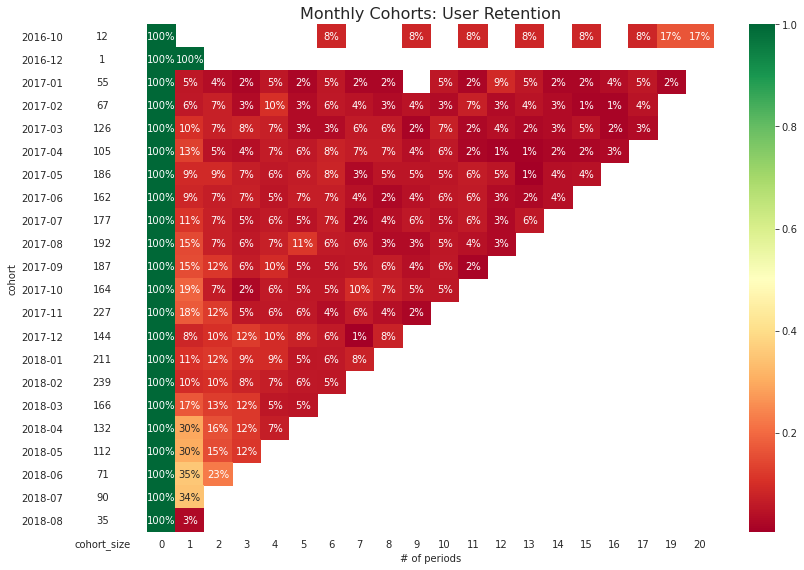

In [298]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


What do you notice? 

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

In [301]:
import numpy as np

In [302]:
n_orders = df.groupby(['customer_unique_id'])['order_id'].nunique()
orders_perc2 = np.sum(n_orders > 1) / df['customer_unique_id'].nunique()
# 3,12% of customers have ordered more than once
orders_perc2*100 

3.0307524444114877

Here is the code for the analysis of customers who have bought more than once : 

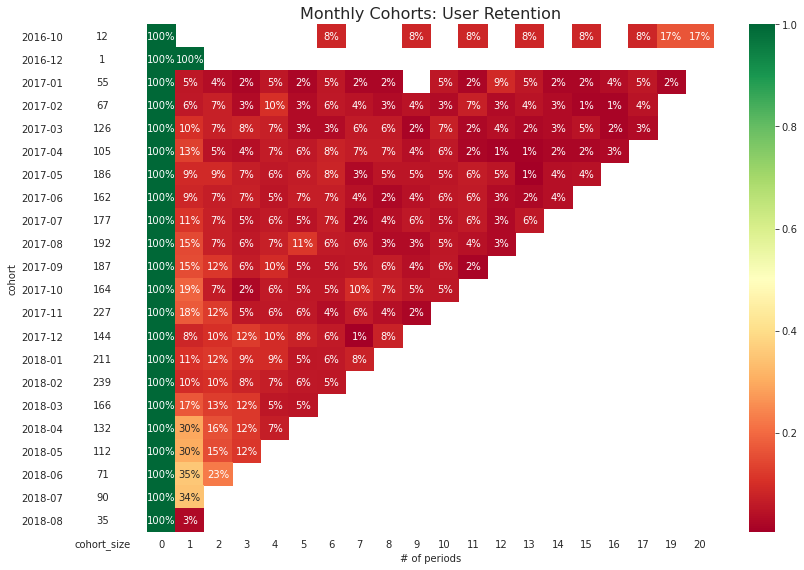

In [299]:
#start from your df created doing the RFM segmentation
df_c = df[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

df_c['order_month'] = df_c['order_purchase_timestamp'].dt.to_period('M')

df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[
                       df_c.groupby('customer_unique_id').size() > 1])

df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(
    columns={0: 'na'})

df_c = df_c[df_c['na'].notna()]
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform('min') \
    .dt.to_period('M')

df_cohort = df_c.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (
    df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()